In [1]:
# this code is generated by the Domino Code Assist toolbar button
import domino_code_assist as dca
dca.init()

Cannot show ipywidgets in text

# Introduction

Hello everyone, this is my take on the **Heart Attack Analysis and Prediction** dataset in which I've made some interesting and insighful visualizations and I've also tried a few machine learning models to predict whether a person is likely to have a heart attack or not.

### Note

If you find it helpful and intuitive, then feel free to upvote the notebook. If there's anything I can improve on then do comment down below, your opinions and suggestions are valuable to me! Thank you! :)

### Feature Description

The following are the description of each feature:

    1. age - age in years
    
    2. sex - sex ( 0 = female; 1 = male)
    
    3. cp - chest pain type (0 = asymptomatic; 1 = typical angina; 2 = atypical angina; 3 = non-anginal pain;)
    
    4. trestbps - resting blood pressure (in mm Hg on admission to the hospital)
    
    5. chol - serum cholestoral in mg/dl
    
    6. fbs - fasting blood sugar > 120 mg/dl (1 = true; 0 = false)
    
    7. restecg - resting electrocardiographic results (0 = hypertrophy ;1 = normal; 2 = having ST-T wave abnormality)
    
    8. thalach - maximum heart rate achieved
    
    9. exang - exercise induced angina (1 = yes; 0 = no)
    
    10. oldpeak - ST depression induced by exercise relative to rest
    
    11. slope - the slope of the peak exercise ST segment (0 = downsloping; 1 = flat; 2 = upsloping)
    
    12. ca - number of major vessels (0-3) colored by fluoroscopy
    
    13. thal - 1 = fixed defect; 2 = normal; 3 = reversible defect
    
    14. num - the predicted attribute - diagnosis of heart disease (angiographic disease status) (Value 0 = < diameter narrowing; Value 1 = > 50% diameter narrowing)


***

# Importing libraries

In [2]:
import pandas as pd
import numpy as np

# For visualizations
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.lines import Line2D

# For feature selection
from sklearn.feature_selection import mutual_info_classif
from scipy import stats
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

# For model selection, modelling and testing

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression,RidgeClassifier,SGDClassifier,PassiveAggressiveClassifier
from sklearn.linear_model import Perceptron
from sklearn.svm import SVC,LinearSVC,NuSVC
from sklearn.neighbors import KNeighborsClassifier,NearestCentroid
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB,BernoulliNB

from sklearn.metrics import precision_score,accuracy_score
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV,RepeatedStratifiedKFold
from sklearn.ensemble import VotingClassifier

import os
for dirname, _, filenames in os.walk('/mnt/data/Heart-Attack-prediction'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        
from warnings import filterwarnings

/mnt/data/Heart-Attack-prediction/heart.csv
/mnt/data/Heart-Attack-prediction/.Trash-12574/info/heart.csv.trashinfo
/mnt/data/Heart-Attack-prediction/.Trash-12574/files/heart.csv


***

# Loading the dataset

In [3]:
index=['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']

In [4]:
df=pd.read_csv('/mnt/data/Heart-Attack-prediction/heart.csv',names=index,header=0)

In [5]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
1,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
1,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
1,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
1,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
1,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
1,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
1,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 303 entries, 1 to 1
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 35.5 KB


***

# Colors

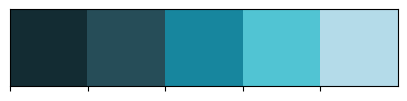

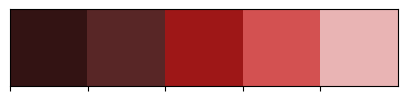

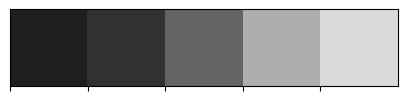

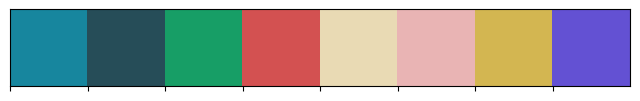

In [7]:
colors_blue = ["#132C33", "#264D58", '#17869E', '#51C4D3', '#B4DBE9']
colors_dark = ["#1F1F1F", "#313131", '#636363', '#AEAEAE', '#DADADA']
colors_red = ["#331313", "#582626", '#9E1717', '#D35151', '#E9B4B4']
colors_mix = ["#17869E", '#264D58', '#179E66', '#D35151', '#E9DAB4', '#E9B4B4', '#D3B651', '#6351D3']
sns.palplot(colors_blue)
sns.palplot(colors_red)
sns.palplot(colors_dark)
sns.palplot(colors_mix)

***

# EDA

I tried to explore the data with the help of visualizations to find some interesting insights about it which could be useful for the model.

In [8]:
def grouping(age):
    if age>=18 and age<=30:
        return 0
    elif age>=31 and age<=40:
        return 1
    elif age>=41 and age<=50:
        return 2
    elif age>=51 and age<=60:
        return 3
    else:
        return 4

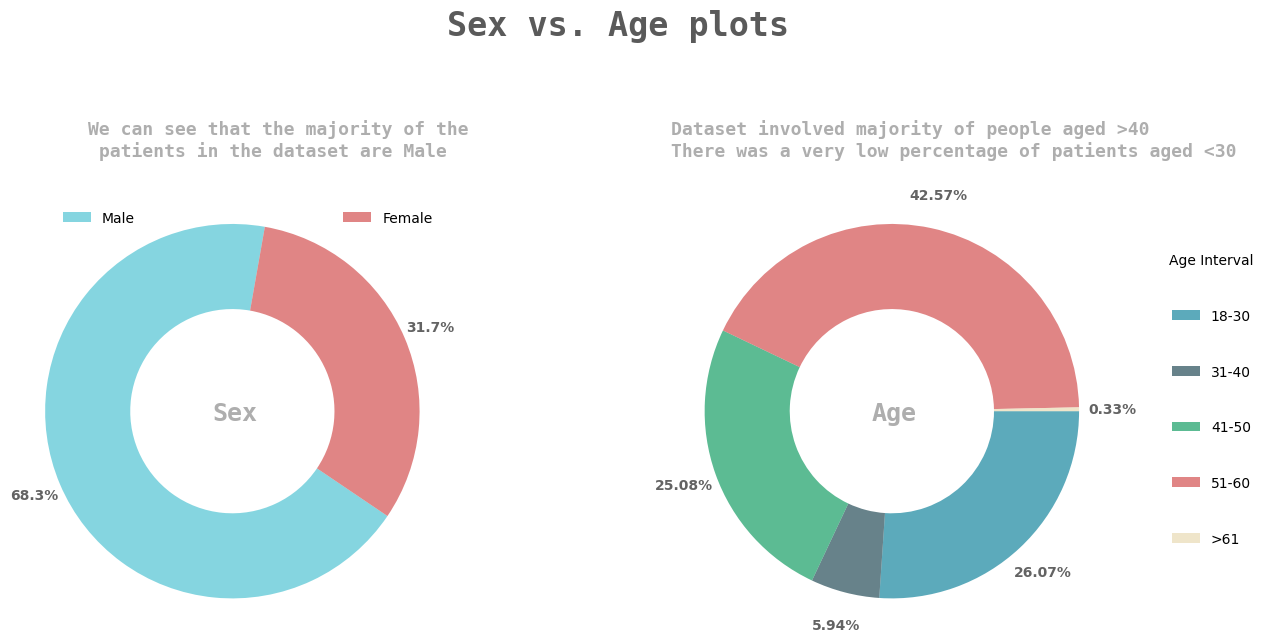

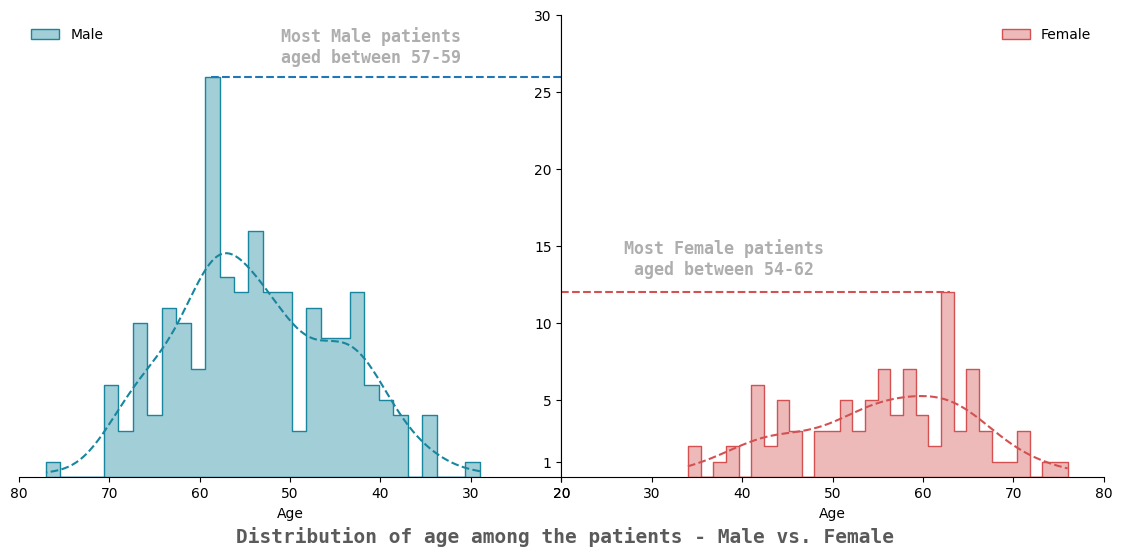

In [9]:
age_int = df['age'].apply(grouping).value_counts(sort=False)

labels=['18-30','31-40','41-50','51-60','>61']


# Pie Charts

fig,ax = plt.subplots(1,2,figsize=(14,16))

fig.text(s='Sex vs. Age plots',size=24,fontweight='bold',fontname='monospace',
             color=colors_dark[1],y=0.73,x=0.43,alpha=0.8)

# Pie Chart - Left

ax[0].pie(df['sex'].value_counts(),autopct='{:.1f}%'.format,
          colors=[colors_blue[3],colors_red[3]],wedgeprops={'width':0.5,'alpha':0.7},
          pctdistance=1.15,startangle=80,radius=1.1,textprops={'fontsize': 10, 'color': colors_dark[2],
                                                               'fontweight': 'bold'})

ax[0].legend(['Male','Female'],frameon=False,ncol=2,columnspacing=15,loc='upper right')

ax[0].text(s='We can see that the majority of the\n patients in the dataset are Male',
               fontdict={'color':colors_dark[3],'size':13,'fontweight':'bold','fontname':'monospace',
                         },x=-0.85,y=1.5)

ax[0].text(s='Sex',fontdict={'color':colors_dark[3],'size':18,'fontweight':'semibold','fontname':'monospace'}
           ,x=-0.12,y=-0.05)

#Pie Chart - Right

ax[1].pie(age_int,autopct='{:.2f}%'.format,colors=colors_mix,wedgeprops={'width':0.5,'alpha':0.7},
          pctdistance=1.18,radius=1.1,textprops={'fontsize': 10, 'color': colors_dark[2],'fontweight': 'bold'},
         counterclock=False)

ax[1].legend(labels,frameon=False,bbox_to_anchor=(1.38,0.9),labelspacing=3,title='Age Interval')

ax[1].text(s='Dataset involved majority of people aged >40\nThere was a very low percentage of patients aged <30',
               fontdict={'color':colors_dark[3],'size':13,'fontweight':'bold','fontname':'monospace',
                         },x=-1.3,y=1.5)

ax[1].text(s='Age',fontdict={'color':colors_dark[3],'size':18,'fontweight':'semibold','fontname':'monospace'}
           ,x=-0.12,y=-0.05)


fig.subplots_adjust(wspace=0.55)

# Histograms with KDE

fig,ax = plt.subplots(1,2,figsize=(14,6),sharey=False)

# Left Hist

sns.histplot(df[df['sex']==1]['age'],ax=ax[0],bins=30,alpha=0.4,color=colors_blue[2],
             element='step',kde=True,line_kws={'ls':'--'})
ax[0].set_xlim(20,80)
ax[0].set_ylim(0,30)
ax[0].invert_xaxis()
ax[0].spines['top'].set_color(None)
ax[0].spines['left'].set_color(None)
ax[0].yaxis.tick_right()
ax[0].set_ylabel(None)
ax[0].set_yticks([])
ax[0].set_xlabel('Age')
ax[0].legend(['Male'],loc='upper left',frameon=False)
ax[0].axhline(y=26,xmin=1,xmax=1-(39/60),ls='--')

ax[0].set_title('Most Male patients\naged between 57-59',y=0.88,x=0.65,
                fontdict={'color':colors_dark[3],'size':12,'fontweight':'bold','fontname':'monospace'})

# Right Hist

sns.histplot(df[df['sex']==0]['age'],ax=ax[1],bins=30,alpha=0.4,color=colors_red[3],
             element='step',kde=True,line_kws={'ls':'--'})
ax[1].set_xlim(20,80)
ax[1].set_ylim(0,30)
ax[1].spines['top'].set_color(None)
ax[1].spines['right'].set_color(None)
ax[1].set_ylabel(None)
ax[1].set_yticks([1,5,10,15,20,25,30])
ax[1].set_xlabel('Age')
ax[1].legend(['Female'],loc='upper right',frameon=False)
ax[1].axhline(y=12,xmin=0,xmax=43/60,ls='--',color=colors_red[3])

ax[1].set_title('Most Female patients\naged between 54-62',y=0.42,x=0.3,
                fontdict={'color':colors_dark[3],'size':12,'fontweight':'bold','fontname':'monospace'})
fig.subplots_adjust(wspace=0)

fig.text(s='Distribution of age among the patients - Male vs. Female',size=14,fontweight='bold',
             fontname='monospace',color=colors_dark[1],y=0,x=0.28,alpha=0.8)

plt.show()


## Some Data Cleaning

Before doing any further analysis on the data, we should first correct the incorrect data within some columns:

The values of **thal** lies between 1-3 but in the dataset, there's also a value 0 in 2 rows.

So we'll replace them with the most frequent value in the thal column

In [10]:
df['thal']=df['thal'].apply(lambda x: int(df['thal'].mode()) if (x==0) else int(x))

In [11]:
df['thal'].value_counts()

2    168
3    117
1     18
Name: thal, dtype: int64

Also, the values in the **ca** feature should range between 0-3 but it also contains other value, 4 which indicated null values.

Instead of imputing the values, I'll be removing these rows from the dataset

In [12]:
df.drop(df[df['ca']==4].index,inplace=True)

In [13]:
df['ca'].value_counts()

Series([], Name: ca, dtype: int64)

In [14]:
df.reset_index(drop=True,inplace=True)

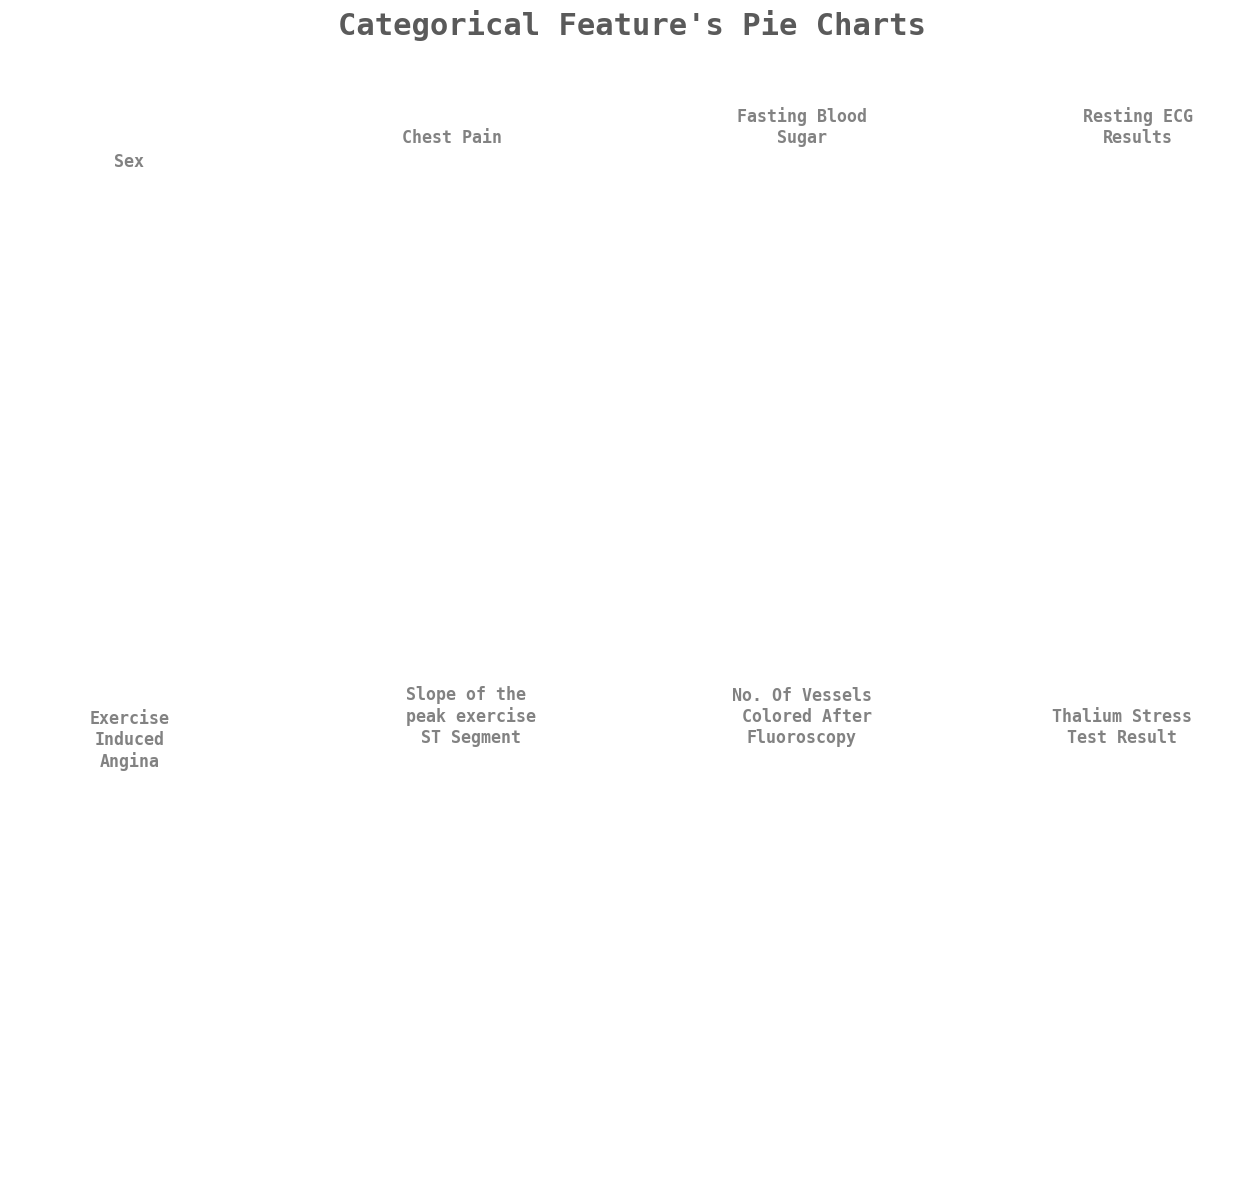

In [15]:
l = ['sex','cp','fbs','restecg','exang','slope','ca','thal']
c = [colors_red[3],colors_dark[4],colors_dark[3],colors_dark[2]]
lab = [['Male','Female'],
       ['Asymptomatic','Atypical Angina','Typical Angina','Non-Anginal Pain'],
       ['<120 mg/dl','>120 mg/dl'],
       ['Normal','Hypertrophy','ST-T Wave Abnormality'],
       ['No','Yes'],
       ['Upsloping','Flat','Downsloping'],
       ['0','1','2','3'],
       ['Normal','Reversible Defect','Fixed Defect']
      ]
title = ['Sex','Chest Pain','Fasting Sugar Level','Resting Electrocardiographic Results','Exercise Induced Angina',
        'Slope','No. Of Vessels Colored By Fluoroscopy','Thalium Stress Test Result']

fig,ax = plt.subplots(2,4,figsize=(16,12))

fig.text(s='Categorical Feature\'s Pie Charts',size=22,fontweight='bold',
             fontname='monospace',color=colors_dark[1],y=0.99,x=0.33,alpha=0.8)

for i in range(0,8):
        ax[i//4,i%4].pie(df[l[i]].value_counts(),autopct='{:.1f}%'.format,counterclock=False,
          colors=c,wedgeprops={'width':0.5,'alpha':0.7},pctdistance=1.27,startangle=80,radius=1.1,
                         textprops={'fontsize': 10, 'color': colors_dark[2],'fontweight': 'bold'})
        ax[i//4,i%4].legend(lab[i],loc='lower center',bbox_to_anchor=(0.6,-0.55),frameon=False,
                            labelspacing=0.8,fontsize=11)
        
fig.text(s='Sex',size=12,fontweight='bold',fontname='monospace',
         color=colors_dark[2],y=0.88,x=0.19,alpha=0.8)        
fig.text(s='Chest Pain',size=12,fontweight='bold',fontname='monospace',
         color=colors_dark[2],y=0.90,x=0.37,alpha=0.8)        
fig.text(s='Fasting Blood\nSugar',size=12,fontweight='bold',fontname='monospace',
         color=colors_dark[2],y=0.90,x=0.62,alpha=0.8,ha='center')
fig.text(s='Resting ECG\nResults',size=12,fontweight='bold',fontname='monospace',
         color=colors_dark[2],y=0.90,x=0.83,alpha=0.8,ha='center')

fig.text(s='Exercise\nInduced\nAngina',size=12,fontweight='bold',fontname='monospace',
         color=colors_dark[2],y=0.38,x=0.2,alpha=0.8,ha='center')
fig.text(s='Slope of the\n peak exercise\n ST Segment',size=12,fontweight='bold',fontname='monospace',
         color=colors_dark[2],y=0.4,x=0.41,alpha=0.8,ha='center')
fig.text(s='No. Of Vessels\n Colored After\nFluoroscopy',size=12,fontweight='bold',fontname='monospace',
         color=colors_dark[2],y=0.4,x=0.62,alpha=0.8,ha='center')
fig.text(s='Thalium Stress\nTest Result',size=12,fontweight='bold',fontname='monospace',
         color=colors_dark[2],y=0.4,x=0.82,alpha=0.8,ha='center')

fig.subplots_adjust(wspace=0.35,hspace=1)

type: zero-size array to reduction operation fmax which has no identity

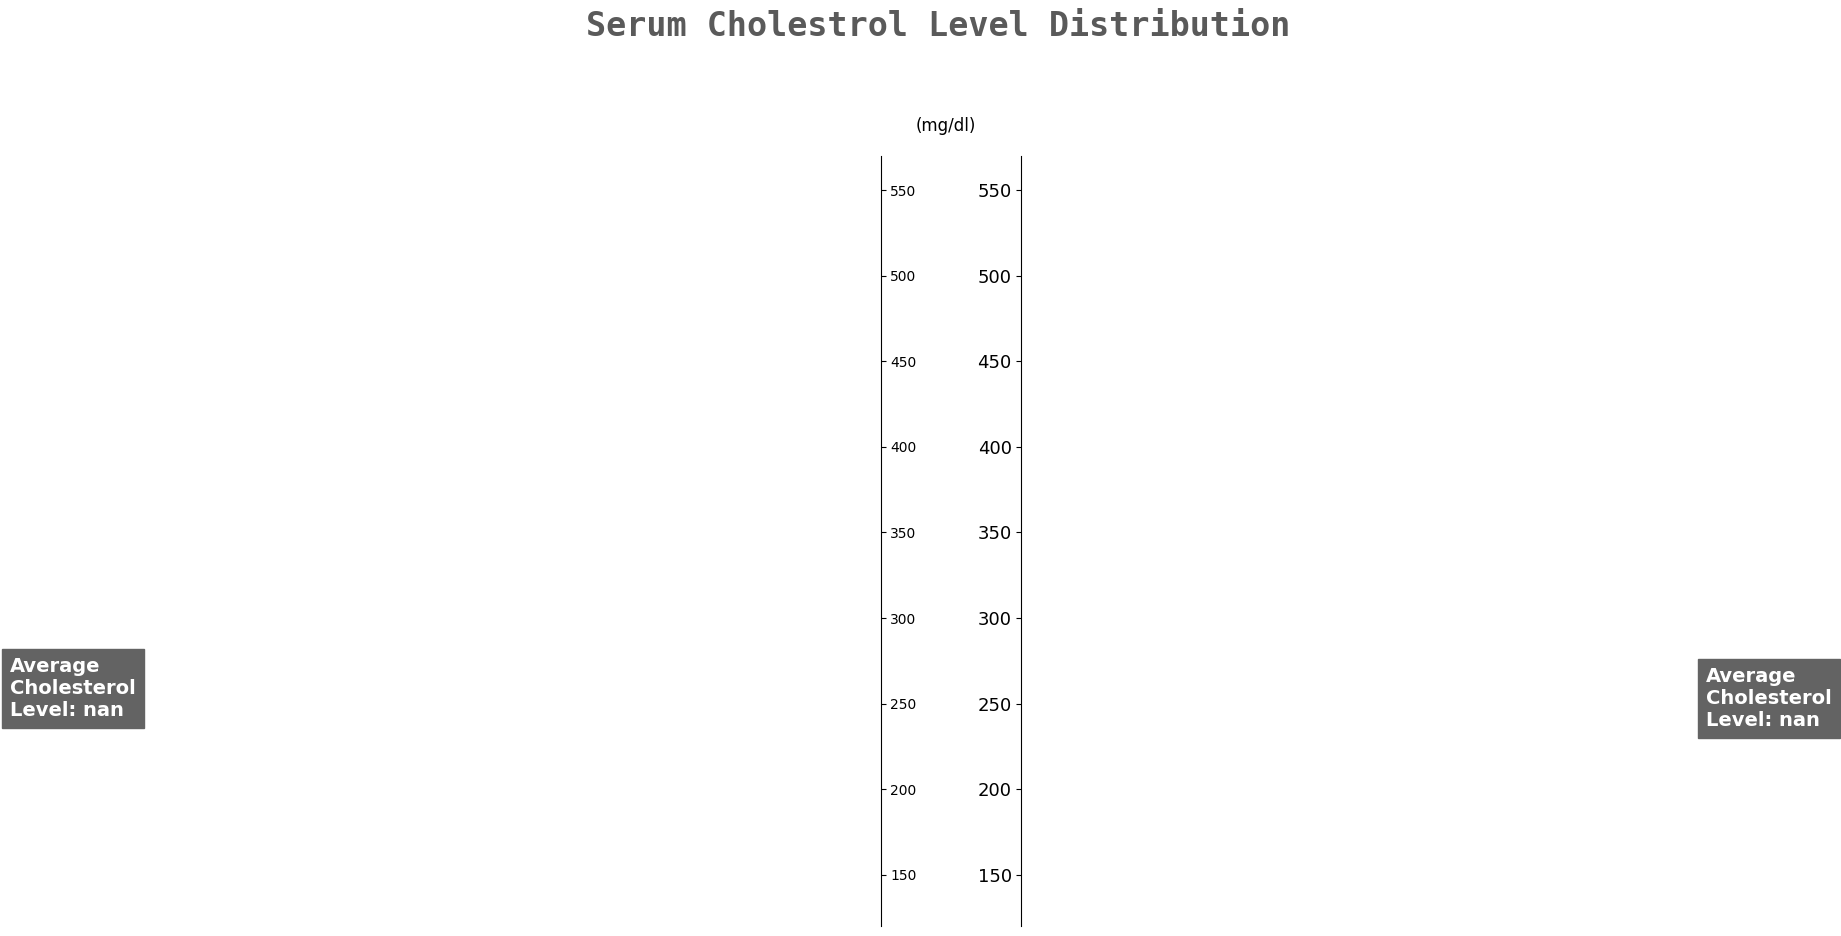

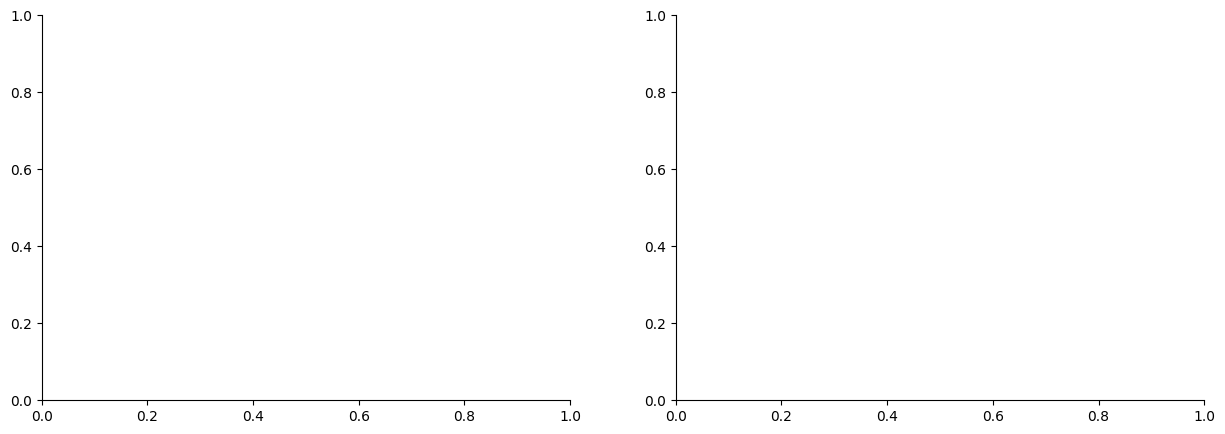

In [16]:
filterwarnings('ignore')

mean_0 = df[df['target']==0]['chol'].mean()
mean_1 = df[df['target']==1]['chol'].mean()

custom_lines = [Line2D([0], [0], marker='o', color=colors_blue[3], markerfacecolor=colors_blue[2],ls='--',
                       alpha=0.7),
                Line2D([0], [0], marker='o', color=colors_red[3], markerfacecolor=colors_red[2],ls='--',
                       alpha=0.7)]

fig,ax = plt.subplots(1,2,figsize=(20,10),sharey=False)

fig.text(s='Serum Cholestrol Level Distribution',size=24,fontweight='bold',
             fontname='monospace',color=colors_dark[1],y=1,x=0.33,alpha=0.8)


# Left Line Plot

ax[0].plot(df[df['target']==0]['chol'],marker='o',lw=0.8,ls='--',alpha=0.7,color=colors_blue[3],
            markerfacecolor=colors_blue[2],markersize=5)
ax[0].hlines(mean_0,xmin=165,xmax=400,ls='--',color=colors_dark[2])
ax[0].invert_xaxis()
ax[0].spines['top'].set_color(None)
ax[0].spines['left'].set_color(None)
ax[0].set_ylim(120,570)
ax[0].set_xticks([])
ax[0].set_xlim(305,150)
ax[0].yaxis.tick_right()
ax[0].spines['bottom'].set_color(None)
fig.text(s='Average\nCholesterol\nLevel: {:.2f}'.format(mean_0),x=0.042,y=0.32,color='white',
         backgroundcolor=colors_dark[2],fontsize=14,weight='bold')


# Right Line Plot

ax[1].plot(df[df['target']==1]['chol'],marker='o',lw=0.8,ls='--',alpha=0.7,color=colors_red[3],
          markerfacecolor=colors_red[2],markersize=5)
ax[1].hlines(mean_1,xmin=0,xmax=170,ls='--',color=colors_dark[2])
ax[1].spines['top'].set_color(None)
ax[1].spines['right'].set_color(None)
ax[1].spines['bottom'].set_color(None)
ax[1].set_ylim(120,570)
ax[1].set_xticks([])
ax[1].tick_params(axis='y', which='major', labelsize=13)
ax[1].set_title('',y=0.42,x=0.3,
                fontdict={'color':colors_dark[3],'size':12,'fontweight':'bold','fontname':'monospace'})
fig.text(s='Average\nCholesterol\nLevel: {:.2f}'.format(mean_1),x=0.89,y=0.31,color='white',
         backgroundcolor=colors_dark[2],fontsize=14,weight='bold')

fig.text(s='(mg/dl)',x=0.51,y=0.905,fontdict={'color':'black','size':12,'ha':'center'})


fig2,ax = plt.subplots(1,2,figsize=(15,5),sharey=False)
sns.despine(fig2)

# Left KDE Plot

df[df['target']==0]['chol'].plot.kde(ls='--',color=colors_blue[2],ax=ax[0])
ax[0].spines['left'].set_color(None)
ax[0].set_ylabel(None)
ax[0].set_yticks([])
ax[0].set_xlabel('Serum Cholestrol Level (mg/dl)',fontsize=12)
line = ax[0].get_lines()[-1]
x, y = line.get_data()
mask1 = x > 200
mask2 = x>=240
x1, y1 = x[mask1], y[mask1]
x2,y2 = x[mask2],y[mask2]
ax[0].fill_between(x1, y1, alpha=0.5, facecolor=colors_blue[3])
ax[0].fill_between(x2, y2, alpha=0.5, facecolor=colors_blue[2])
ax[0].hlines(0.0018,xmin=300,xmax=510,ls='-.',color=colors_dark[2],lw=0.8)
ax[0].hlines(0.005,xmin=225,xmax=500,ls='-.',color=colors_dark[2],lw=0.8)

# Right KDE Plot

df[df['target']==1]['chol'].plot.kde(ls='--',color=colors_red[3],ax=ax[1])
ax[1].spines['left'].set_color(None)
ax[1].set_ylabel(None)
ax[1].set_yticks([])
fig2.text(s='',
          x=0.55,y=0.65,
         fontdict={'color':colors_dark[3],'size':14,'fontweight':'semibold','fontname':'monospace','ha':'center'})
ax[1].set_xlabel('Serum Cholestrol Level (mg/dl)',fontsize=12)
line = ax[1].get_lines()[-1]
x,y = line.get_data()
mask1 = x > 200
mask2 = x>=240
x1, y1 = x[mask1], y[mask1]
x2,y2 = x[mask2],y[mask2]
ax[1].fill_between(x1, y1, alpha=0.5, facecolor=colors_red[3])
ax[1].fill_between(x2, y2, alpha=0.5, facecolor=colors_red[2])
ax[1].hlines(0.0020,xmin=-80,xmax=300,ls='-.',color=colors_dark[2],lw=0.8)
ax[1].hlines(0.0059,xmin=-80,xmax=225,ls='-.',color=colors_dark[2],lw=0.8)
ax[1].vlines(x=564,ymin=0,ymax=0.0018,ls='-.',color=colors_dark[2],lw=0.8)

fig2.text(s='High\nCholesterol',x=0.55,y=0.30,
         fontdict={'color':'white','size':11.5,'fontweight':'semibold','fontname':'monospace','ha':'center'},
         backgroundcolor=colors_dark[2])
fig2.text(s='Borderline High\nCholesterol',x=0.55,y=0.60,
         fontdict={'color':'white','size':11.5,'fontweight':'semibold','fontname':'monospace','ha':'center'},
         backgroundcolor=colors_dark[2])
fig2.text(s='Outlier',x=0.885,y=0.33,
         fontdict={'color':'white','size':11.5,'fontweight':'semibold',
                   'fontname':'monospace','ha':'center'},backgroundcolor=colors_dark[2])


fig.legend(handles=custom_lines,labels=('<50% Narrowing','>50% Narrowing'),frameon=False,
           ncol=2,bbox_to_anchor=(0.81,0.95),columnspacing=30,fontsize=16)



fig.subplots_adjust(wspace=0)
fig2.subplots_adjust(wspace=0.1,right=1)


In [ ]:
mean_0 = df[df['target']==0]['trestbps'].mean()
mean_1 = df[df['target']==1]['trestbps'].mean()

custom_lines = [Line2D([0], [0], marker='o', color=colors_blue[3], markerfacecolor=colors_blue[2],ls='--',
                       alpha=0.7),
                Line2D([0], [0], marker='o', color=colors_red[3], markerfacecolor=colors_red[2],ls='--',
                       alpha=0.7)]

fig,ax = plt.subplots(1,2,figsize=(20,10),sharey=False)

fig.text(s='Resting Blood Pressure Distribution',size=24,fontweight='bold',
             fontname='monospace',color=colors_dark[1],y=1,x=0.34
             ,alpha=0.8)

# Left Line Plot

ax[0].plot(df[df['target']==0]['trestbps'],marker='o',lw=0.8,ls='--',alpha=0.7,color=colors_blue[3],
            markerfacecolor=colors_blue[2],markersize=5)
ax[0].hlines(mean_0,xmin=160,xmax=400,ls='--',color=colors_dark[2])
ax[0].invert_xaxis()
ax[0].spines['top'].set_color(None)
ax[0].spines['left'].set_color(None)
ax[0].set_ylim(85,205)
ax[0].set_xticks([])
ax[0].set_xlim(305,150)
ax[0].yaxis.tick_right()
ax[0].spines['bottom'].set_color(None)
fig.text(s='Average \nBP: {:.2f}'.format(mean_0),x=0.055,y=0.42,color='white',backgroundcolor=colors_dark[2],
        fontsize=14,weight='bold')


# Right Line Plot

ax[1].plot(df[df['target']==1]['trestbps'],marker='o',lw=0.8,ls='--',alpha=0.7,color=colors_red[3],
          markerfacecolor=colors_red[2],markersize=5)
ax[1].hlines(mean_1,xmin=-10,xmax=170,ls='--',color=colors_dark[2])
ax[1].spines['top'].set_color(None)
ax[1].spines['right'].set_color(None)
ax[1].spines['bottom'].set_color(None)
ax[1].set_ylim(85,205)
ax[1].set_xticks([])
ax[1].tick_params(axis='y', which='major', labelsize=13)
fig.text(s='Average \nBP: {:.2f}'.format(mean_1),x=0.89,y=0.39,color='white',backgroundcolor=colors_dark[2],
        fontsize=14,weight='bold')
fig.text(s='(mm Hg)',x=0.51,y=0.905,fontdict={'color':'black','size':12,'ha':'center'})


fig2,ax = plt.subplots(1,2,figsize=(15,5),sharey=False)
sns.despine(fig2)

# Left KDE Plot

df[df['target']==0]['trestbps'].plot.kde(ls='--',color=colors_blue[2],ax=ax[0])
ax[0].spines['left'].set_color(None)
ax[0].set_ylabel(None)
ax[0].set_yticks([])
ax[0].set_xlabel('Resting Blood Pressure (mm Hg)',fontsize=12)
line = ax[0].get_lines()[-1]
x, y = line.get_data()
mask = x > 140
x, y = x[mask], y[mask]
ax[0].fill_between(x, y1=y, alpha=0.5, facecolor=colors_blue[3])
ax[0].hlines(0.0080,xmin=150,xmax=237,ls='-.',color=colors_dark[2],lw=0.8)


# Right KDE Plot

df[df['target']==1]['trestbps'].plot.kde(ls='--',color=colors_red[3],ax=ax[1])
ax[1].spines['left'].set_color(None)
ax[1].set_ylabel(None)
ax[1].set_yticks([])
fig2.text(s='The distribution plot of blood\n pressure among both kind\n of patients is very\n similar',
          x=0.55,y=0.65,
         fontdict={'color':colors_dark[3],'size':14,'fontweight':'semibold','fontname':'monospace','ha':'center'})
ax[1].set_xlabel('Resting Blood Pressure (mm Hg)',fontsize=12)
line = ax[1].get_lines()[-1]
x,y = line.get_data()
mask = x>140
x,y = x[mask],y[mask]
ax[1].fill_between(x,y,alpha=0.5,facecolor = colors_red[3])
fig2.text(s='Patients with\n Hypertension',x=0.55,y=0.38,
         fontdict={'color':'white','size':11.5,'fontweight':'semibold','fontname':'monospace','ha':'center'},
         backgroundcolor=colors_dark[2])
ax[1].hlines(0.0085,xmin=50,xmax=150,ls='-.',color=colors_dark[2],lw=0.8)


fig.legend(handles=custom_lines,labels=('<50% Narrowing','>50% Narrowing'),frameon=False,
           ncol=2,bbox_to_anchor=(0.81,0.95),columnspacing=30,fontsize=16)



fig.subplots_adjust(wspace=0)
fig2.subplots_adjust(wspace=0.1,right=1)

type: zero-size array to reduction operation fmax which has no identity

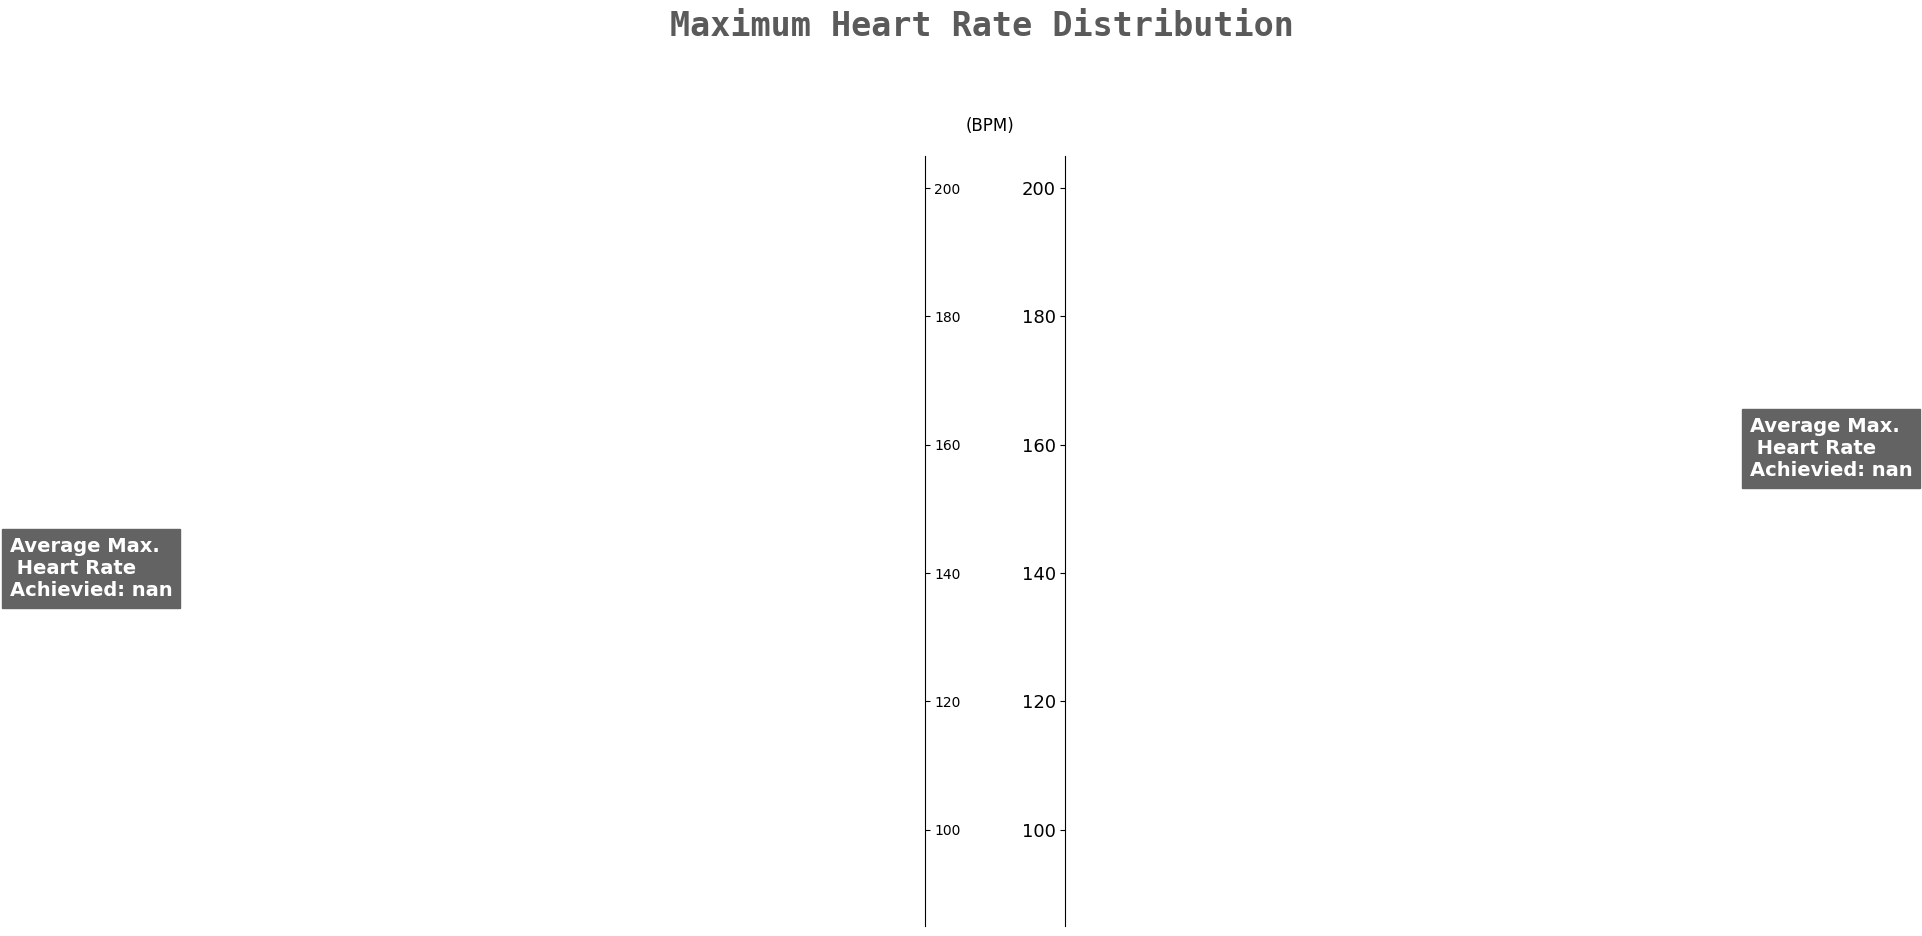

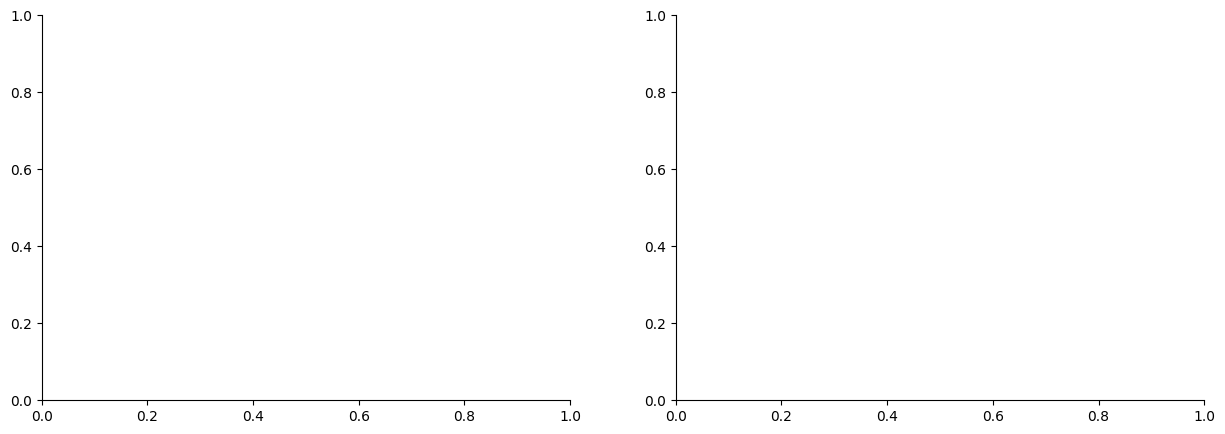

In [17]:
mean_0 = df[df['target']==0]['thalach'].mean()
mean_1 = df[df['target']==1]['thalach'].mean()

custom_lines = [Line2D([0], [0], marker='o', color=colors_blue[3], markerfacecolor=colors_blue[2],ls='--',
                       alpha=0.7),
                Line2D([0], [0], marker='o', color=colors_red[3], markerfacecolor=colors_red[2],ls='--',
                       alpha=0.7)]

fig,ax = plt.subplots(1,2,figsize=(20,10),sharey=False)

fig.text(s='Maximum Heart Rate Distribution',size=24,fontweight='bold',
             fontname='monospace',color=colors_dark[1],y=1.0,x=0.35,alpha=0.8)

# Left Line Plot

ax[0].plot(df[df['target']==0]['thalach'],marker='o',lw=0.8,ls='--',alpha=0.7,color=colors_blue[3],
            markerfacecolor=colors_blue[2],markersize=5)
ax[0].hlines(mean_0,xmin=160,xmax=400,ls='--',color=colors_dark[2])
ax[0].invert_xaxis()
ax[0].spines['top'].set_color(None)
ax[0].spines['left'].set_color(None)
ax[0].set_ylim(85,205)
ax[0].set_xticks([])
ax[0].set_xlim(305,150)
ax[0].yaxis.tick_right()
ax[0].spines['bottom'].set_color(None)
fig.text(s='Average Max.\n Heart Rate \nAchievied: {:.2f}'.format(mean_0),x=0.02,y=0.44,color='white',
         backgroundcolor=colors_dark[2],fontsize=14,weight='bold')


# Right Line Plot

ax[1].plot(df[df['target']==1]['thalach'],marker='o',lw=0.8,ls='--',alpha=0.7,color=colors_red[3],
          markerfacecolor=colors_red[2],markersize=5)
ax[1].hlines(mean_1,xmin=-10,xmax=170,ls='--',color=colors_dark[2])
ax[1].spines['top'].set_color(None)
ax[1].spines['right'].set_color(None)
ax[1].spines['bottom'].set_color(None)
ax[1].set_ylim(85,205)
ax[1].set_xticks([])
ax[1].tick_params(axis='y', which='major', labelsize=13)
fig.text(s='Average Max.\n Heart Rate \nAchievied: {:.2f}'.format(mean_1),x=0.89,y=0.56,color='white',
         backgroundcolor=colors_dark[2],fontsize=14,weight='bold')
fig.text(s='(BPM)',x=0.51,y=0.905,fontdict={'color':'black','size':12,'ha':'center'})


fig2,ax = plt.subplots(1,2,figsize=(15,5),sharey=False)
sns.despine(fig2)

# Left KDE Plot

df[df['target']==0]['thalach'].plot.kde(ls='--',color=colors_blue[2],ax=ax[0])
ax[0].spines['left'].set_color(None)
ax[0].set_ylabel(None)
ax[0].set_yticks([])
ax[0].set_xlabel('Max. Heart Rate Achieved (BPM)',fontsize=12)


# Right KDE Plot

df[df['target']==1]['thalach'].plot.kde(ls='--',color=colors_red[3],ax=ax[1])
ax[1].spines['left'].set_color(None)
ax[1].set_ylabel(None)
ax[1].set_yticks([])
fig2.text(s='The average\n"Maximum Heart Rate"\nof patients with\n>50% Narrowing \nwere {:.2f}% higher'.format((mean_1-mean_0)*100/mean_0),
          x=0.57,y=0.5,
         fontdict={'color':colors_dark[3],'size':14,'fontweight':'semibold','fontname':'monospace','ha':'center'})
ax[1].set_xlabel('Max. Heart Rate Achieved (BPM)',fontsize=12)


fig.legend(handles=custom_lines,labels=('<50% Narrowing','>50% Narrowing'),frameon=False,
           ncol=2,bbox_to_anchor=(0.81,0.95),columnspacing=30,fontsize=16)


fig.subplots_adjust(wspace=0)
fig2.subplots_adjust(wspace=0.1,right=1)

In [ ]:
fig,ax = plt.subplots(figsize=(15,8))
sns.swarmplot(data=df,y='oldpeak',x='target',ax=ax,palette=[colors_blue[3],colors_red[3]])
sns.despine(fig)
ax.set_yticks(np.linspace(0,6.5,14))
ax.set_ylabel('ST Depression Induced By Exercise Relative To Rest',fontsize=12)
ax.set_xlabel('Target',fontsize=12)
ax.set_xticklabels(['<50% Narrowing','>50% Narrowing'])
ax.set_title('Old Peak Distribution',size=18,fontweight='bold',
             fontname='monospace',color=colors_dark[1],y=1.05,x=0.5,alpha=0.8)

plt.show()

### Distribution of categorical with respect to the target feature

In [ ]:
col_mix = [colors_blue[3],colors_red[3]]


fig,ax = plt.subplots(2,2,figsize=(14,12))

fig.text(s="Categorial Features Distributions",size=20,fontweight='bold',fontname='monospace',
             color=colors_dark[1],y=1,x=0.33,alpha=0.8)


sns.despine()


sns.countplot(data=df,x='sex',hue='target',ax=ax[0][0],palette=col_mix,alpha=0.55,edgecolor=colors_dark[2],
              lw=1.25,saturation=1)
ax[0,0].get_legend().remove()
ax[0,0].set_xlabel('Sex',fontsize=12)
ax[0,0].set_title('80.2% of Female\npatients had\n >50% narrowing',y=0.65,x=0.3,
                fontdict={'color':colors_dark[3],'size':12,'fontweight':'semibold','fontname':'monospace'})
ax[0,0].spines['left'].set_position(('outward', 8))
ax[0,0].set_ylim(0,120)
ax[0,0].set_ylabel(None)


sns.countplot(data=df,x='cp',hue='target',ax=ax[0][1],palette=col_mix,alpha=0.55,edgecolor=colors_dark[2],
             lw=1.25,saturation=1)
ax[0,1].get_legend().remove()
ax[0,1].set_ylabel(None)
ax[0,1].set_xlabel('Chest Pain Type',fontsize=12)
ax[0,1].set_title('Patients with non-asymptomatic chest pain\n tended to have a greater chance\n of having a heart disease',
                  y=0.77,x=0.7,
                  fontdict={'color':colors_dark[3],'size':12,'fontweight':'semibold','fontname':'monospace'})
ax[0,1].spines['left'].set_position(('outward', 8))
ax[0,1].set_ylim(0,110)


sns.countplot(data=df,x='fbs',hue='target',ax=ax[1][0],palette=col_mix,alpha=0.55,edgecolor=colors_dark[2],
             lw=1.25,saturation=1)
ax[1,0].get_legend().remove()
ax[1,0].set_xlabel('Fasting Blood Sugar',fontsize=12)

ax[1,0].set_title('The variance seems\nsmall which might\nnot prove helpful\nto the model',y=0.27,x=0.75,
                fontdict={'color':colors_dark[3],'size':12,'fontweight':'semibold','fontname':'monospace'})
ax[1,0].spines['left'].set_position(('outward', 8))
ax[1,0].set_ylim(0,140)
ax[1,0].set_ylabel(None)


sns.countplot(data=df,x='restecg',hue='target',ax=ax[1][1],palette=col_mix,alpha=0.55,edgecolor=colors_dark[2],
             lw=1.25,saturation=1)
ax[1,1].set_ylabel(None)
ax[1,1].get_legend().remove()
ax[1,1].set_xlabel('Resting Electrocardiographic Results',fontsize=12)
ax[1,1].set_title('62.16% of patients with\n "Normal" ECG result tended\n to have a greater chance\n of having a heart disease',
                  y=0.60,x=0.95,fontdict={'color':colors_dark[3],'size':12,'fontweight':'semibold','fontname':'monospace'})
ax[1,1].spines['left'].set_position(('outward', 8))
ax[1,1].set_ylim(0,100)

plt.subplots_adjust(wspace=0.5,hspace=0.5)
fig.legend(['<50% Narrowing','>50% Narrowing'],frameon=False,ncol=2,
           columnspacing=7,fontsize=12,bbox_to_anchor=(0.71,0.97))

plt.show()

In [ ]:
col_mix = [colors_blue[3],colors_red[3]]

fig,ax = plt.subplots(2,2,figsize=(14,12))

fig.text(s="Categorial Features Distributions",size=20,fontweight='bold',fontname='monospace',
             color=colors_dark[1],y=1,x=0.33,alpha=0.8)

sns.despine()

sns.countplot(data=df,x='exang',hue='target',ax=ax[0][0],palette=col_mix,alpha=0.55,edgecolor=colors_dark[2],
              lw=1.25,saturation=1)
ax[0,0].get_legend().remove()
ax[0,0].set_xlabel('Excercise Induced Angina',fontsize=12)
ax[0,0].set_title('69% of patients\nwho did not have EIA\nhad a heart disease',y=0.73,x=0.74,
                fontdict={'color':colors_dark[3],'size':12,'fontweight':'semibold','fontname':'monospace'})
ax[0,0].spines['left'].set_position(('outward', 8))
ax[0,0].set_ylim(0,150)
ax[0,0].set_ylabel(None)


sns.countplot(data=df,x='slope',hue='target',ax=ax[0][1],palette=col_mix,alpha=0.55,edgecolor=colors_dark[2],
             lw=1.25,saturation=1)
ax[0,1].get_legend().remove()
ax[0,1].set_ylabel(None)
ax[0,1].set_xlabel('Slope of the peak exercise\nST segment',fontsize=12)
ax[0,1].set_title('74.82% of patients\n with upsloping slope\n in the ST segment\n had a heart disease',
                  y=0.82,x=0.5,
                  fontdict={'color':colors_dark[3],'size':12,'fontweight':'semibold','fontname':'monospace'})
ax[0,1].spines['left'].set_position(('outward', 8))
ax[0,1].set_ylim(0,110)


sns.countplot(data=df,x='ca',hue='target',ax=ax[1][0],palette=col_mix,alpha=0.55,edgecolor=colors_dark[2],
             lw=1.25,saturation=1)
ax[1,0].get_legend().remove()
ax[1,0].set_xlabel('Number Of Major\n Vessels Colored By\n Fluoroscopy',fontsize=12)

ax[1,0].set_title('43.62% of all the\npatients had a\n heart disease while\nhaving 0 colored vessels\n after Fluoroscopy',
                  y=0.5,x=0.57,fontdict={'color':colors_dark[3],
                                          'size':12,'fontweight':'semibold','fontname':'monospace'})
ax[1,0].spines['left'].set_position(('outward', 8))
ax[1,0].set_ylim(0,140)
ax[1,0].set_ylabel(None)


sns.countplot(data=df,x='thal',hue='target',ax=ax[1][1],palette=col_mix,alpha=0.55,edgecolor=colors_dark[2],
             lw=1.25,saturation=1)
ax[1,1].set_ylabel(None)
ax[1,1].get_legend().remove()
ax[1,1].set_xlabel('Thalium Stress Test Result',fontsize=12)
ax[1,1].set_title('77.58% of patients\n with "Normal" Stress\n Test result had\n a heart disease',y=0.65,x=0.23,
                fontdict={'color':colors_dark[3],'size':12,'fontweight':'semibold','fontname':'monospace'})
ax[1,1].spines['left'].set_position(('outward', 8))
ax[1,1].set_ylim(0,100)

plt.subplots_adjust(wspace=0.5,hspace=0.5)
fig.legend(['<50% Narrowing','>50% Narrowing'],frameon=False,ncol=2,
           columnspacing=7,fontsize=12,bbox_to_anchor=(0.71,0.97))

plt.show()

***

# Feature Selection

In [ ]:
corr = df.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
cols = list(df.columns)

fig,ax = plt.subplots(figsize=(18,10))
ax = sns.heatmap(corr,annot=True,cmap=colors_blue,alpha=0.6,linewidths=2,
            annot_kws={'weight':'bold','family':'monospace','size':11},mask=mask)
ax.set_xticks(np.linspace(0.5,12.5,13))
ax.set_yticks(np.linspace(1.5,13.5,13))
ax.set_xticklabels(labels=cols[:-1],
                   fontdict={'weight':'semibold','family':'monospace','size':11,
                             'color':colors_dark[1],'y':-0.01})
ax.set_yticklabels(labels=cols[1:],
                   fontdict={'weight':'semibold','family':'monospace','size':11,
                             'color':colors_dark[1],'x':-0.01})
fig.suptitle('Correlation\n\nBetween\n\nFeatures',
             size=24,fontweight='bold',fontname='monospace',
             color=colors_dark[1],y=0.72,x=0.5,alpha=0.8)
plt.show()

Now let's see which features are significant to our target column

## Performing Pearson's Regression Test

In this, we find the correlation coefficient between the features and the target variable.<br> 
After that we find the p-value and check it against alpha (Significance Level) to see if a feature will be significant to our model or not. 

In [ ]:
new_df = df.drop(['sex','cp','fbs','restecg','exang','slope','ca','thal','target'],axis=1)
for i in new_df.columns:
    r,p = stats.pearsonr(df['target'],new_df[i])
    if p<0.01:
        print(f'{i} is significant')
    else:
        print(f'{i} is not significant')

## Using mutual_info_classif 

Note: We can only use this if we're facing a classification problem.<br> For regression problems, we can use the mutual_info_regression function from the feature_selection library.

In [ ]:
X=df.drop('target',axis=1)
y=df['target']

In [ ]:
model = mutual_info_classif(X,y)
model_series=pd.Series(model)
model_series.index= X.columns
model_series.sort_values(ascending=False)

With this, we can use the top 8 features

In [ ]:
top_8_cols = SelectKBest(mutual_info_classif,k=8)
top_8_cols.fit(X,y)
X.columns[top_8_cols.get_support()]

## Performing Chi-Square Test

In [ ]:
chi_df=df[['sex','cp','fbs','restecg','exang','slope','ca','thal','target']]
X_chi=chi_df.drop('target',axis=1)
y_chi=chi_df['target']
f,p=chi2(X_chi,y_chi)

The smaller the p-value, the better a particular feature is in this test.
Also, The bigger the f-value, the better a feature is,

In [ ]:
chi_p = pd.Series(p)
chi_p.index = X_chi.columns
chi_p.sort_values()

So after all the tests and some trial and error, I decided to choose the following features for my model.

In [ ]:
X = df[['thal','exang','cp','ca','sex','oldpeak','slope']]
y=df['target']

***

# Modelling

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=np.random.randint(1,1000,1)[0])

In [ ]:
scaler = StandardScaler()
scaler.fit(X_train)
scaled_train = scaler.transform(X_train)
scaled_test = scaler.transform(X_test)

In [ ]:
scaled_train

In [ ]:
X_train = pd.DataFrame(scaled_train,columns=X.columns,index=X_train.index)

In [ ]:
X_test = pd.DataFrame(scaled_test,columns=X.columns,index=X_test.index)

In [ ]:
X_test.to_numpy()

## Spot Checking

**Spot Checking** is a fast and easy way to see which algorithms will work the best with the features.
It gives you a good starting point as to which algorithms you should focus on depending upon their results.

In [ ]:
models =[("LR", LogisticRegression(max_iter=1000)),("SVC", SVC()),('KNN',KNeighborsClassifier(n_neighbors=10)),
         ("DTC", DecisionTreeClassifier()),("GNB", GaussianNB()),
        ("SGDC", SGDClassifier()),("Perc", Perceptron()),("NC",NearestCentroid()),
        ("Ridge", RidgeClassifier()),("NuSVC", NuSVC()),("BNB", BernoulliNB()),
         ('RF',RandomForestClassifier()),('ADA',AdaBoostClassifier()),
        ('XGB',GradientBoostingClassifier()),('PAC',PassiveAggressiveClassifier())]

results = []
names = []
finalResults = []

for name,model in models:
    model.fit(X_train, y_train)
    model_results = model.predict(X_test)
    score = precision_score(y_test, model_results,average='macro')
    results.append(score)
    names.append(name)
    finalResults.append((name,score))
    
finalResults.sort(key=lambda k:k[1],reverse=True)

In [ ]:
finalResults[:10]

***

# Final Model

After alot of trial and error, I found out 6 algorithms which worked the best with my chosen features.
They were:
1. Logistic Regression
2. SVC
3. Random Forest
4. PassiveAgressiveClassifer
5. SGDC
6. KNN

## Hyperparameter Tuning

In [ ]:
model_params = {
    'Logistic Regression':
    {
        'model':LogisticRegression(max_iter=1000),
        'abbr' : 'LR',
        'params':
        {
            'C':np.logspace(-3,2,30),
            'class_weight':['balanced',None]
        }
    },
    'SVM':
    {
        'model':SVC(),
        'abbr' : 'SVC',
        'params':
        {
            'C':np.logspace(-3,2,30),
            'gamma':np.logspace(-3,2,30)
        }
    },
    'Random Forest':
    {
        'model':RandomForestClassifier(),
        'abbr' : 'RF',
        'params':
        {
            'n_estimators':[10,50,100,200],
            'max_features':['auto','sqrt','log2'],
            'max_depth':list(range(1,11))
        }
    },
    'K-Nearest Neighbors':
    {
        'model':KNeighborsClassifier(),
        'abbr' : 'KNN',
        'params':
        {
            'n_neighbors':list(range(1,41)),
            'weights':['uniform','distance']
        }
    },
    'Passive Aggressive Classifier':
    {
        'model':PassiveAggressiveClassifier(),
        'abbr' : 'PAC',
        'params':
        {
            'C':np.logspace(-3,1,30),
            'loss':['hinge','squared_hinge']
        }
    },
    'SGD':
    {
        'model':SGDClassifier(),
        'abbr' : 'SGD',
        'params':
        {
            'alpha':np.logspace(-3,1,30),
            'penalty':['l1','l2','elasticnet'],
            'l1_ratio':[0.05,0.1,0.15,0.20,0.25,0.35,0.5,0.6,0.7,0.8,0.9],
        }
    }
}

In [ ]:
# License for code in this notebook: BSD 3 clause
# import everything we'll need for the rest of the notebook
import os
from copy import copy
from itertools import product
import pprint
import shutil
import time
from typing import Dict


import matplotlib.pyplot as plt
import mlflow
import numpy as np
from sklearn import datasets, metrics, svm
from sklearn.model_selection import train_test_split

# create an experiment in MLflow


# we'll make the name unique in the project by appending a timestamp so that you and other users can run this cell more than once.
timestamp = time.time()
username = os.environ['DOMINO_STARTING_USERNAME']
experiment_name = f"heart-attack-classifier-version 1"
# below, we'll use the returned experiment_id in calls to mlflow.start_run() to add data to the experiment.
#experiment_id = mlflow.create_experiment(experiment_name)

current_experiment=dict(mlflow.get_experiment_by_name(experiment_name))
experiment_id=current_experiment['experiment_id']


print(f"Experiment id: {experiment_id}")
print(f"Experiment name: {experiment_name}")

In [ ]:

# define a function that uses an SVM to classify the digits while recording relevant info as an MLflow run 
# within the given experiment.
def create_run_svm_classify(
    experiment_id: str,
    train_x: np.ndarray,
    train_y: np.ndarray,
    test_x: np.ndarray,
    test_y: np.ndarray,
    random_seed: int,
    svc_param_kwargs: Dict = None,
    run_name: str = None,
):
    """
    Record an MLflow run for experiment_id.
    Trains a Support Vector Machine classifier using train_x, train_y, and the given svm_param_kwargs.
    Then, predicts using test_x and test_y and logs params, metrics, artifacts, and model to MLflow.

    :param str experiment_id: id of the MLflow experiment in which to record the run
    :param np.ndarray train_x: x values for the training data
    :param np.ndarray train_y: y values for the training data
    :param np.ndarray test_x: x values for the test data
    :param np.ndarray test_y: y values for the test data
    :param int random_seed: used to set the random seed for all random number generators in this run 
        (e.g. numpy seed, sklearn model random state, etc.)
    :param Dict svc_param_kwargs: kwargs to use when creating the sklearn.svm.SVC (e.g. C, kernel, etc.)
    :param str run_name: name for the run in MLflow. If None, MLflow will generate a random name
    """
    if random_seed is None:
        random_seed = 42
    svc_param_kwargs = svc_param_kwargs or {}
    svc_param_kwargs["random_state"] = random_seed

    np.random.seed(random_seed)

    # passing experiment_id tells MLflow to associate the run data with the correct experiment.
    with mlflow.start_run(experiment_id=experiment_id, run_name=run_name) as run:
        if run_name is None:
            run_name = run.info.run_name
        pretty_params = pprint.pformat(svc_param_kwargs, width=1, indent=2)
        print("******************************************")
        print("******************************************")
        print(f"Starting run {run_name} in experiment {experiment_id} with SVC params:")
        print(f"{pretty_params}")

        print("Initializing model...")
        classifier = svm.SVC(**svc_param_kwargs)

        print("Training model...")
        classifier.fit(train_x, train_y)

        print("Predicting using trained model...")
        predicted = classifier.predict(test_x)
        prediction_report_str = metrics.classification_report(test_y, predicted, digits=3, output_dict=False)
        prediction_report_dict = metrics.classification_report(test_y, predicted, output_dict=True)

        # print some info about the run and also save as file for an MLflow artifact
        print("Finished predictions.")
        run_overview = (
            f"Run: {run_name}\n"
            f"Random seed: {random_seed}\n"
            "Classifier type: sklearn.svm.SVC\n"
            "Specified classifier params:\n"
            f"{pretty_params}"
            "\n"
            "Classification report:\n"
            f"{prediction_report_str}\n"
        )
        print(f"{run_overview}")
        run_overview_file_name = "run_overview.txt"
        with open(run_overview_file_name, "w") as f:
            f.write(run_overview)

        # visualize model performance and save visualization for an MLflow artifact
        disp = metrics.ConfusionMatrixDisplay.from_predictions(test_y, predicted)
        disp.figure_.suptitle(f"Confusion Matrix - Run {run_name}")
        confusion_matrix_file_name = f"confusion_matrix_run_{run_name}.png"
        plt.savefig(confusion_matrix_file_name)
        plt.show()

        print("Recording run params, metrics, and artifacts to MLflow...")
        # record notable sklearn model params and performance metrics.
        # this enables visual comparison via the Experiments UI.
        for param, val in svc_param_kwargs.items():
            mlflow.log_param(param, val)
        # record metrics for each individual digit as well as overall averages
        for metric in ("precision", "recall", "f1-score"):
            for digit in {str(num) for num in range(0, 10)}:
                mlflow.log_metric(f"{metric}_{digit}", prediction_report_dict[digit][metric])
            for avg_type in ("macro", "weighted"):
                mlflow.log_metric(f"{metric}_{avg_type}_avg", prediction_report_dict[f"{avg_type} avg"][metric])
        mlflow.log_metric("overall_accuracy", prediction_report_dict["accuracy"])

        # record the data for reproducibility
        data_dir_name = "run_data"
        os.mkdir(data_dir_name)
        for data, data_name in ((train_x, "train_x"), (train_y, "train_y"), (test_x, "test_x"), (test_y, "test_y")):
            with open(os.path.join(data_dir_name, f"{data_name}.csv"), "w") as data_file:
                np.savetxt(data_file, data, delimiter=",")
        mlflow.log_artifact(data_dir_name)
        shutil.rmtree(data_dir_name)

        # record human-readable/interpretable overview and figures
        mlflow.log_artifact(run_overview_file_name)
        mlflow.log_artifact(confusion_matrix_file_name)

        # record the trained sklearn model
        mlflow.sklearn.log_model(classifier, "model")
        print("Finishing recording.")

In [ ]:
X.info()

In [ ]:
# split the data into train and test subsets
train_x, test_x, train_y, test_y = train_test_split(
    X, y, test_size=0.20, shuffle=True
)
train_x

In [ ]:
X.info()

#df['date_time'] = pd.Timestamp("now")

In [ ]:
import pickle
import uuid
import datetime
import numpy as np


import mlflow.pyfunc
model_name= "heart-attack-LR-model"
version = 1
model_uri = "models:/{model_name}/{version}".format(model_name=model_name,version=version)

model = mlflow.pyfunc.load_model(model_uri=model_uri)

# from domino_prediction_logging.prediction_client import PredictionClient
from domino_data_capture.data_capture_client import DataCaptureClient

features = ['thal','exang','cp','ca','sex','oldpeak','slope']

target = ["target"]

# pred_client = PredictionClient(features, target)
data_capture_client = DataCaptureClient(features, target)

def predict(thal,exang,cp,ca,sex,oldpeak,slope, _id=None):
    feature_values = [thal,exang,cp,ca,sex,oldpeak,slope]
    prediction = model.predict([feature_values]).tolist()


    # Record eventID and current time
    if _id is None:
        print("No ID found! Creating a new one.")
        wine_id = str(datetime.datetime.now())
        # custid = uuid.uuid4()
    print('ID is: {}'.format(_id))

    # pred_client.record(feature_values, prediction, event_id=custid)
    data_capture_client.capturePrediction(feature_values, prediction,event_id=_id)

    return dict(prediction=prediction[0])

result = predict(1,1,1,1,1,1,1)

In [ ]:
model

# Register training data set


In [ ]:
#X.info()
#y.info()
train_set = train_x
train_set['target'] = train_y
train_set['target'] = train_set.target.astype(str)


In [ ]:
train_set.info()

In [ ]:
from domino.training_sets import TrainingSetClient, model
train_set['id'] = 0
cols = ['thal','exang','cp','ca','sex','oldpeak','slope']
training_set_version = TrainingSetClient.create_training_set_version(
    training_set_name='Heart-attack-dataset',
    df=train_set,
    key_columns=['id'],
    target_columns=["target"],
    monitoring_meta=model.MonitoringMeta(
       categorical_columns = ['target']
       
    ),
    meta={"year": "2023"}
    
)

print(f"TrainingSetVersion {training_set_version.training_set_name}:{training_set_version.number}")

In [ ]:
from sklearn import datasets, metrics, svm
from sklearn.model_selection import train_test_split

cv = RepeatedStratifiedKFold(n_splits=5,n_repeats=2)
scores=[]
run_name='Run Experiment 1'
random_seed = 42
for model_name,params in model_params.items():
    print(params['abbr'])
    # passing experiment_id tells MLflow to associate the run data with the correct experiment.
    with mlflow.start_run(experiment_id=experiment_id, run_name=run_name) as run:
        if run_name is None:
            run_name = run.info.run_name
    
        run_name=f'Model Algorithm {params["abbr"]}'
        print(run_name)
        rs = GridSearchCV(params['model'],params['params'],cv=cv)

        #X_train, X_test= X.iloc[train_index], X.iloc[test_index]
        #y_train, y_test= y[train_index], y[test_index]

        rs.fit(X_train,y_train)
        scores.append([model_name,dict(rs.best_params_),rs.best_score_])

        print("Predicting using trained model...")
        predicted = rs.predict(test_x)
        prediction_report_str = metrics.classification_report(test_y, predicted, digits=3, output_dict=False)
        prediction_report_dict = metrics.classification_report(test_y, predicted, output_dict=True)

        
        print("Recording run params, metrics, and artifacts to MLflow...")
        pretty_params = pprint.pformat(rs.best_params_, width=1, indent=2)
        run_overview = (
            f"Run: {run_name}\n"
            f"Random seed: {random_seed}\n"
            "Classifier type: sklearn.svm.SVC\n"
            "Specified classifier params:\n"
            f"{pretty_params}"
            "\n"
            "Classification report:\n"
            f"{prediction_report_str}\n"
        )
        print(f"{run_overview}")
        run_overview_file_name = "run_overview.txt"
        with open(run_overview_file_name, "w") as f:
            f.write(run_overview)
        # record human-readable/interpretable overview and figures
        mlflow.log_artifact(run_overview_file_name)
        
        rs.best_params_['random_seed'] = random_seed

        # record notable sklearn model params and performance metrics.
        # this enables visual comparison via the Experiments UI.
        for param, val in rs.best_params_.items():
            mlflow.log_param(param, val)
        
        # record the trained sklearn model
        mlflow.sklearn.log_model(rs, f"model-{params['abbr']}")

        data=pd.DataFrame(scores,columns=['Model','Parameters','Score'])
data

Here are the best parameters for all of my chosen models

***

# Ensembling The Models

Ensembling your best models tend to give better overall results and it is a good practice whenever you want to solve a problem.

In [ ]:
param=data['Parameters']
model = VotingClassifier(estimators=[('LR',LogisticRegression(**param[0])),
                                           ('SVC', SVC(**param[1])),
                                           ('RF',RandomForestClassifier(**param[2])),
                                           ('KNN',KNeighborsClassifier(**param[3])),
                                           ('PAC',PassiveAggressiveClassifier(**param[4])),
                                           ('SGD',SGDClassifier(**param[5]))
                                          ],voting='hard')

accuracy=[]

skf = RepeatedStratifiedKFold(n_splits=5,n_repeats=2)
skf.get_n_splits(X,y)

for train_index, test_index in skf.split(X,y):
    
    X_train, X_test= X.iloc[train_index], X.iloc[test_index]
    y_train, y_test= y[train_index], y[test_index]
    
    model.fit(X_train,y_train)
    predictions=model.predict(X_test)
    score=accuracy_score(y_test,predictions)
    accuracy.append(score)
    

In [ ]:
np.mean(accuracy)

# Conclusion

The model turned out to be ~85% accurate with the ensemble technique.<br>
With this, I'll conclude the EDA and Modelling of the Heart Disease Dataset!

***

# <center>Thank You!